# Quick Start

## Disclaimer

FXCM Group, LLC and each of its affiliates and subsidiaries are herein referred to as, "FXCM".

Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits. Leverage can work against you. Due to the certain restrictions imposed by the local law and regulation, German resident retail client(s) could sustain a total loss of deposited funds but are not subject to subsequent payment obligations beyond the deposited funds. Be aware and fully understand all risks associated with the market and trading. Prior to trading any products, carefully consider your financial situation and experience level. Any opinions, news, research, analyses, prices, or other information is provided as general market commentary, and does not constitute investment advice. FXCM will not accept liability for any loss or damage, including without limitation to, any loss of profit, which may arise directly or indirectly from use of or reliance on such information.

## Introduction

FXCM provides a **RESTful API** (henceforth the "API") to interact with its trading platform. Among others, it allows the retrieval of **historical data** as well as of **streaming data**. In addition, it allows to place different types of **orders** and to read out **account information**. The overall goal is to allow the implementation **automated, algortithmic trading programs**.

In this documentation, you learn all about the `fxcmpy` Python wrapper package (henceforth just `fxcmpy` or "package").

## Demo Account

To get started with the the API and the package, a **demo account** with FXCM is sufficient. You can open such an account under https://www.fxcm.com/uk/algorithmic-trading/api-trading/.

## Python Installation

`fxcmpy` works with **Python 3.4** and later. If you need to install **Python** itself and/or additional **packages**, we recommend the use of the `conda` package and environment manager. 

To this end, you can download the `Miniconda` installer from https://conda.io/miniconda.html for your operating system and get it installed.

You can then download and use the following `yaml` file to create a Python environment:

http://fxcmpy.tpq.io/_static/fxcm.yml

Having downloaded this file, the **environment** is created on the command line as follows:

    conda env create -f fxcm.yml -n fxcm
    
Activate it under Mac OS/Linux via:

    conda activate fxcm
    
And under Windows via:

    activate fxcm
    
You can then start, for instance, **Jupyter** to interactively explore the examples of this documentation.

## Package Installation

Installation via `pip` install on the command line.

    pip install fxcmpy
    
Make sure to update/upgrade regularly via

    pip install fxcmpy --upgrade

Working in an interactive context (e.g. `IPython` or `Jupyter`), you can then check whether the package is installed via

In [1]:
import fxcmpy

In [2]:
fxcmpy.__version__

'1.1.15'

## API Token

To connect to the API, you need an **API token** that you can create or revoke from within your (demo) account in the Trading Station https://tradingstation.fxcm.com/.

**Important**: For Real accounts, please send **an email with you user name** to <a href="mailto:api@fxcm.com">api@fxcm.com</a> to get RESTful API access and to activate your token, respectively. Demo accounts have REST API enabled by default.

In an interactive context, you can use e.g. a variable called `TOKEN` to reference your unique API token.

    TOKEN = YOUR_FXCM_API_TOKEN

Connecting to the server, then boils down to the following line of code.

    con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error')

However, it is recommended to store the API token in a **configuration file** which allows for re-usability and hides the token on the GUI level. The file should contain the following lines.

    [FXCM]
    log_level = error
    log_file = PATH_TO_AND_NAME_OF_LOG_FILE
    access_token = YOUR_FXCM_API_TOKEN

It is assumed onwards that this file is in the current working directory and that its name is `fxcm.cfg`.

With such a configuration file in the current working directory, only the filename need to be passed as a parameter to **connect to the API**.

In [3]:
con = fxcmpy.fxcmpy(config_file='fxcm.cfg')

By default, the class connects to the `demo` server.

    con = fxcmpy.fxcmpy(config_file='fxcm.cfg', server='demo')
    
To connect to the live server, the `server` parameter must be set to `real`.

    con = fxcmpy.fxcmpy(config_file='fxcm.cfg', server='real')

## First Steps

Having established the connection to the API, data retrieval is straightforward.

For example, you can look up which **instruments** are available via the `con.get_instruments()` method.

In [4]:
print(con.get_instruments())

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'Bund', 'XAU/USD', 'XAG/USD']


Simlarly, **historical data** is retrieved via the `con.get_cancles()` method.

In [5]:
data = con.get_candles('EUR/USD', period='m1', number=250)

In [6]:
data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2018-04-18 03:59:00,1.23819,1.23816,1.23820,1.23815,1.23819,1.23817,1.23821,1.23817,46
2018-04-18 04:00:00,1.23816,1.23816,1.23817,1.23815,1.23817,1.23817,1.23818,1.23815,29
2018-04-18 04:01:00,1.23816,1.23816,1.23816,1.23815,1.23817,1.23817,1.23817,1.23817,7
2018-04-18 04:02:00,1.23816,1.23800,1.23816,1.23799,1.23817,1.23801,1.23817,1.23801,58
2018-04-18 04:03:00,1.23801,1.23803,1.23803,1.23801,1.23802,1.23803,1.23803,1.23802,2


In [7]:
data.tail()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2018-04-18 08:06:00,1.23699,1.23697,1.23702,1.23692,1.23701,1.23698,1.23705,1.23693,149
2018-04-18 08:07:00,1.23697,1.23690,1.23697,1.23683,1.23697,1.23692,1.23699,1.23685,148
2018-04-18 08:08:00,1.23691,1.23683,1.23700,1.23678,1.23693,1.23684,1.23702,1.23681,330
2018-04-18 08:09:00,1.23683,1.23688,1.23697,1.23682,1.23684,1.23688,1.23698,1.23684,171
2018-04-18 08:10:00,1.23688,1.23692,1.23699,1.23682,1.23688,1.23694,1.23700,1.23683,271


Such data can be **visualized** with standard functionality of Python and pandas, for instance.

In [8]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

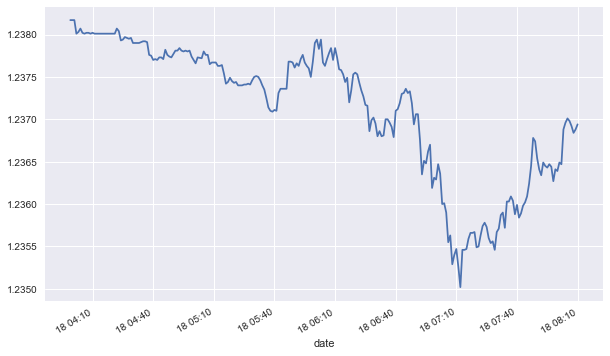

In [9]:
data['askclose'].plot(figsize=(10, 6));

## Resources

If you have questions regarding **demo or full accounts**, reach out to:

* <a href="mailto:info@fxcm.co.uk">info@fxcm.co.uk</a>
* +44 (0) 207 398 4050

If you have questions regarding the **RESTful API**, reach out to:

* <a href="api@fxcm.com">api@fxcm.com</a>

The **detailed documentation of the API** is found under:

* https://github.com/fxcm/RestAPI

The book _Python for Finance &mdash; Mastering Data-Driven Finance_ (O'Reilly) provides detailed information about the use of **Python in Finance**:

* http://pff.tpq.io/.

In-depth courses and programs about **Python for Algorithmic Trading**:

* http://pyalgo.tpq.io
* http://certificate.tpq.io.


## License

Here, you can download the [license text](_static/LICENSE.txt).

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. FXCM's name may not be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY FXCM "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL FXCM BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

## Risk Warning

As a condition to your use, you understand and agree that your download and/or use of the software will expose you to risks associated with the download and/or use of software, including without limitation:

* risk of delays or failures in transmission, connection, or communication;
* risks of error in the data, code, software updates or patches;
* the risk that the software maybe discontinued, terminated or become obsolete at any time without notice;
* modification or updates to the software may cause disruption or errors;
* the risk that you are solely responsible to ensure you obtain and are using the most up to date version of the software, which may be modified or updated without notice; and
* software or data may not be compatible with your equipment or for your use. 

You hereby agree to accept such risks including but not limited to failure of or damage to hardware, software, communication lines or systems, and/or other computer equipment. FXCM expressly disclaims any liability with respect to the foregoing.